<a id="top"></a>

Data : 

    1) features.txt - A dictionary mapping from feature ID to descriptive text. 
       For example, feature 072 corresponds to "Ethiopian" cuisine.

    2) city_hotel_features.txt - A file containing restaurant data.
       Format : restaurant name [TAB] city [TAB] restaurant features (3 digits ids separated by spaces)

Problems :
    
<a href="#output1">1) Given feature_x1, feature_x2, feature_x3 .... feature_xn find best 10 hotels.</a>  
<a href="#output2">2) Find top 5 important features for given city.</a>  
<a href="#output3">3) Generate a model to find similar hotels for given hotel x.</a>  
<a href="#output4">4) Generate a model to find similar feature for given featute y.</a>  
<a href="#output5">5) How to scale if number of hotels OR number of features are more.</a>  
<a href="#output6">6) Segment/Cluster, visualize ... features or hotels based on given data to get the insights.</a>  


## Importing Libraries

In [92]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage


## Loading Datasets

In [2]:
data_path = "../Problem_statement_2/"

In [3]:
cityHotelDf = pd.read_table(data_path+"city_hotel_features.txt")

In [4]:
nbRecords = cityHotelDf.shape[0]

In [5]:
cityHotelDf.head(3)

,Hotel_Name,City_Name,Features
0,Tanner's,atlanta,100 253 250 178 174 063 059 036 008 074 204 05...
1,Frijoleros,atlanta,250 062 132 174 063 197 071 142 234 243 075 20...
2,Indian Delights,atlanta,253 250 150 174 083 059 036 117 243 076 205 05...


In [6]:
featuresDf = pd.read_table(data_path+"features.txt")

In [7]:
featuresDf.head(3)

,ID,Feature_Name
0,0,A
1,1,Authentic
2,2,Afghanistan


#### Merging the two tables
* Creating seperate column for each feature

In [8]:
finalDf = cityHotelDf.copy()

In [9]:
for i in list(featuresDf.ID):
    finalDf[str(i)] = np.zeros(nbRecords).astype(int)

In [10]:
def func(x):
    x[[str(int(i)) for i in x["Features"].split()]] = 1
    return x
finalDf = finalDf.apply(func,axis = 1)


In [11]:
finalDf = finalDf.drop("Features",axis=1)

In [12]:
finalDf.head(1)

,Hotel_Name,City_Name,0,1,2,3,4,5,6,7,...,247,248,249,250,251,252,253,254,255,256
0,Tanner's,atlanta,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0


<a id="code1"></a>


# 1. Given List of features -> find best 10 hotels

In [13]:
def featureHotelMatch(sampleList,df, top=10):
    global featuresDf
    data = df.copy()
    
    # creating an array of the feature matrix
    origArray = np.array(data.iloc[:,2:])
    
    # creating a label encoder
    featureClasses = list(featuresDf.ID)
    le = LabelEncoder()
    le.fit(featureClasses)
    
    # creating a vector representation of the sample List of features
    sampleIndex = le.transform(sampleList)
    sampleVector = np.zeros(len(featureClasses))
    sampleVector[sampleIndex] = 1
    
    # taking dot product to get the projection of the sampleVector in original data subspace
    data["match_score"] = np.dot(origArray,sampleVector)
    
    return data.sort_values(by="match_score",ascending=False)[:top]
    
    

<a href="#output1">Go to Output</a>  
<a href="#top">Go to Top</a>

### <a id="output1">Output for Given feature_x1, feature_x2, feature_x3 .... feature_xn find best 10 hotels</a>  
<a href="#code1"> See code </a>  
<a href="#top">Go to Top</a>

In [14]:
# the sample List is the set of features for which we want recommendations

sampleList = [174,253,36,52,163,204,8,178]


In [15]:
featureHotelMatch(sampleList,finalDf,5)

,Hotel_Name,City_Name,0,1,2,3,4,5,6,7,...,248,249,250,251,252,253,254,255,256,match_score
0,Tanner's,atlanta,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,8.0
4130,T.G.I. Friday's,washington_dc,0,0,0,0,1,1,0,0,...,0,0,1,0,1,1,0,0,0,7.0
190,St. Charles Deli,atlanta,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,7.0
189,Blue Ribbon Grill,atlanta,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,7.0
3490,Mel's Drive-In,san_francisco,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,7.0


<a id="code2"></a>

# 2. Find top 5 important features for given city

In [18]:
def topFeatures(cityName,data,top=5):
    """
    Returns a series with the index = feature , and value = Count of that feature"""
    
    global featuresDf
    
    groupedData = data.groupby(["City_Name"]).sum()
    cityData = groupedData.loc[cityName]
    cityData = cityData.sort_values(ascending =False)[:top]
    
    cityData.index = cityData.index.astype(int)
    
    cityData = pd.DataFrame(cityData)
    cityData = cityData.rename(columns={cityName:"count"})
    
    cityData = cityData.merge(featuresDf,how="inner",left_index=True,right_index=True)
    cityData = cityData.sort_values(by="count",ascending=False)
    
    return cityData

<a href="#output2">Go to Output</a>  
<a href="#top">Go to Top</a>

### <a id="output2">Output for Find top 5 important features for given city</a>  
<a href="#code2">See Code</a>  
<a href="#top">Go to Top</a>

In [19]:
cityName = "boston"
topFeatures(cityName,finalDf)

,count,ID,Feature_Name
250,315,250,Weekend Dining
253,238,253,Wheelchair Access
205,209,205,Excellent Service
75,202,75,Excellent Food
191,180,191,Private Parties


<a id="code3"></a>

# 3. Generate a model to find similar hotels for given hotel x

In [57]:
def similarHotels(hotelName,df,top=5):
    data = df.copy()
        
    # creating dummy codes for the city names as well -> this makes the city as a feature of the hotel type
    
    dataCity = pd.get_dummies(data.City_Name)
    data = data.join(dataCity)
    data = data.drop("City_Name",axis=1)
    
    # creating a KNN classifier
    neig = KNeighborsClassifier(n_neighbors=top)
    
    target_col = ["Hotel_Name"]
    feature_col = list(set(data.columns)-set(target_col))
    X_train = np.array(data[feature_col])
    y_train = np.array(data[target_col])
    
    # training the classifier
    neig.fit(X_train,y_train)
    
    # getting the kNN of the target hotel Name
    X_target = np.array(data[data["Hotel_Name"]==hotelName][feature_col])
    y_target = neig.kneighbors(X_target)
    
    hotelIndexDf = pd.DataFrame(y_target[1].transpose(),columns=["Hotel_Index"])
    distanceDf = pd.DataFrame(y_target[0].transpose(),columns=["Distance"])
    opDf = hotelIndexDf.join(distanceDf)
    
    data = data.merge(opDf,how="inner",left_index=True,right_on="Hotel_Index")
    data = data[["Hotel_Name","Distance"]].sort_values(by="Distance")
    
    return data
    
    
    
    

<a href="#output3">Go to Output</a>  
<a href="#top">Go to Top</a>

### <a id="output3">Output for Generate a model to find similar hotels for given hotel x</a>  
<a href="#code3">See Code</a>  
<a href="#top">Go to Top</a>

In [58]:
hotelName = "Frijoleros"
nb_matches = 5   # no. of similar hotels
similarHotels(hotelName,finalDf,top = nb_matches)

/home/muhabek/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


,Hotel_Name,Distance
0,Frijoleros,0.000000
1,Tortilla's,2.645751
2,Fat Matt's Rib Shack,3.000000
4,Fellini's Pizza,3.316625
3,La Fonda Latina,3.316625


<a id="code4"></a>

# 4. Generate a model to find similar feature for given feature y

The Similarity for features is based on : 
* How many times the feature1 and the feature2 coexist divided by total occurence of the two features.
* also known as Jaccard Coefficient

In [53]:
def similarFeatures(featureName,df,top):
    """ Returns two lists - one with the index, and one with the similarity scores of those indices
    """
    data = df.copy()
    simDict = {}
    non_feature_col = ["Hotel_Name","City_Name",featureName]
    feature_col = list(set(data.columns)-set(non_feature_col))
    for colName in feature_col:
        simDict[colName] = (data[colName] & data[featureName]).sum()/(data[colName] | data[featureName]).sum()
    
    sortedList = sorted(simDict,key=lambda x : simDict[x],reverse=True)
    sortedSim = [simDict[i] for i in sortedList[:top]]
    
    return [sortedList[:top], sortedSim]
    
    
    
    
    
    
    
    
     
    

<a href="#output4">Go to Output</a>  
<a href="#top">Go to Top</a>

### <a id="output4">Output for Generate a model to find similar feature for given feature y</a>  
<a href="#code4">See Code</a>  
<a href="#top">Go to Top</a>

In [63]:
featureName = "0"
nb_matches = 5   # no. of similar features
similarFeatures(featureName,finalDf,top = nb_matches)

[['145', '87', '84', '83', '56'],
 [1.0,
  0.009345794392523364,
  0.009345794392523364,
  0.005291005291005291,
  0.0024390243902439024]]

<a id="output6"></a>

# Clustering the data - creating a Heirarchical Cluster
<a href="#top">Go to top</a>

In [67]:
non_feature_col = ["Hotel_Name","City_Name"]
feature_col = list(set(finalDf.columns)-set(non_feature_col))

In [78]:
featureCount = finalDf[feature_col].sum().sort_values(ascending=False)

### Heirarchical  Clustering

In [93]:
Z = linkage(finalDf[feature_col],"ward")

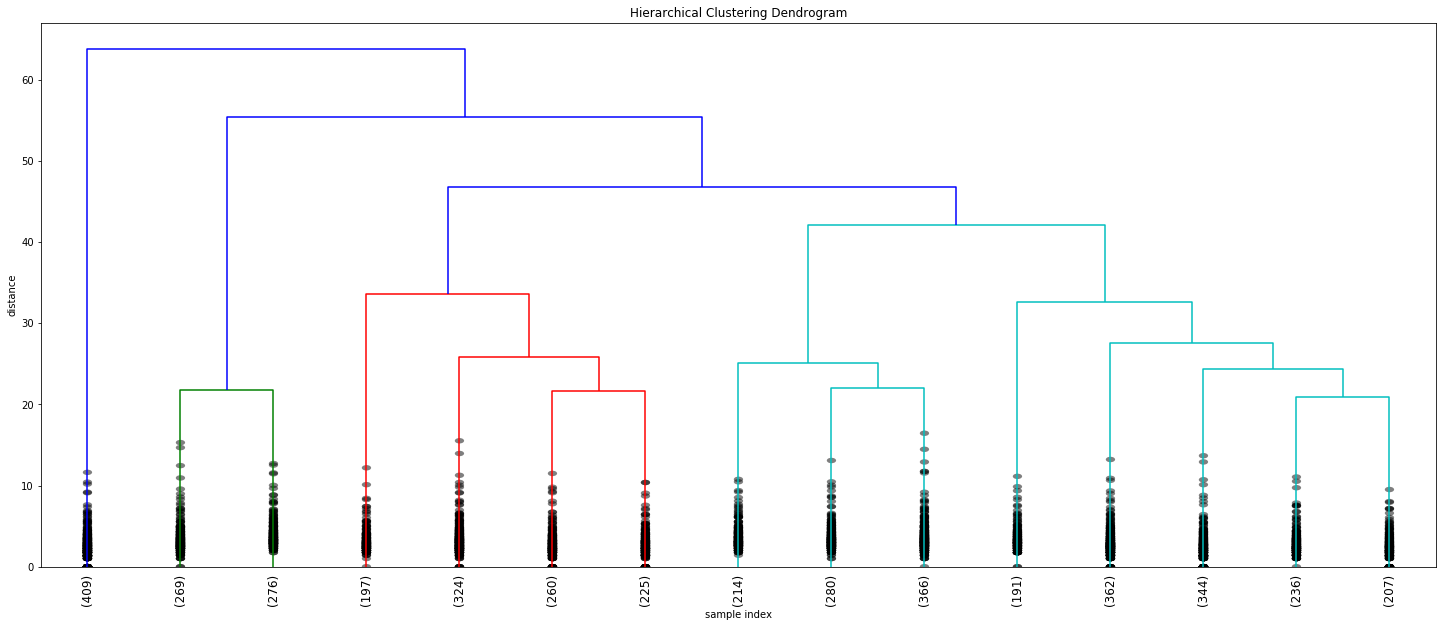

In [119]:
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('features')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  
    p=15,  # show only the last p merged clusters
    show_leaf_counts=True,  
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
)
plt.show()